In [ ]:
import keras
from keras.datasets import boston_housing

from keras.models import Sequential
from keras.layers import Dense

from sklearn import preprocessing
from sklearn.preprocessing import scale
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
x_train_scaled = preprocessing.scale(x_train)

x_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [ ]:

x_test_scaled = preprocessing.scale(x_test)
x_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
#model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='sgd', metrics=['mse'])


In [ ]:
history = model.fit(x_train_scaled, y_train,
 batch_size=128,
epochs=500,
verbose=1,
validation_split = 0.2,
)

Epoch 1/500
3/3 [==============================] - 3s 90ms/step - loss: 560.0954 - mse: 560.0954 - val_loss: 485.1839 - val_mse: 485.1839
Epoch 2/500
3/3 [==============================] - 0s 13ms/step - loss: 318.1894 - mse: 318.1894 - val_loss: 114.6966 - val_mse: 114.6966
Epoch 3/500
3/3 [==============================] - 0s 15ms/step - loss: 76.5082 - mse: 76.5082 - val_loss: 45.7342 - val_mse: 45.7342
Epoch 4/500
3/3 [==============================] - 0s 13ms/step - loss: 32.4391 - mse: 32.4391 - val_loss: 29.2119 - val_mse: 29.2119
Epoch 5/500
3/3 [==============================] - 0s 13ms/step - loss: 24.4127 - mse: 24.4127 - val_loss: 23.3736 - val_mse: 23.3736
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: 21.2104 - mse: 21.2104 - val_loss: 21.7821 - val_mse: 21.7821
Epoch 7/500
3/3 [==============================] - 0s 13ms/step - loss: 19.5391 - mse: 19.5391 - val_loss: 20.2537 - val_mse: 20.2537
Epoch 8/500
3/3 [==============================] - 0s 

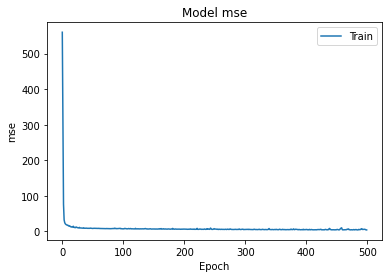

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'])
plt.plot(history.history['mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

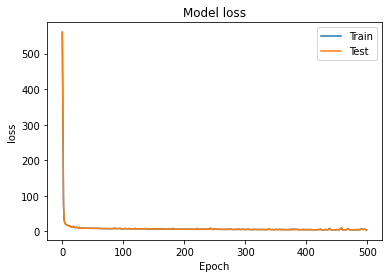

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 14.056503295898438
Test accuracy: 14.056503295898438


In [ ]:

prediction = model.predict(x_test_scaled)
print(prediction.flatten())
print(y_test)


[ 6.796875  18.665121  22.623148  27.711916  25.585615  23.592892
 28.5379    21.89043   19.55656   20.221798  19.517134  17.291168
 15.6682415 42.213085  17.98141   19.971394  24.913635  21.594812
 17.121412  26.787996  11.274623  12.422466  22.697514  14.258584
 18.89646   23.355568  27.772997  27.928034  10.1583605 20.612904
 21.629686  13.762424  32.37659   23.498085  15.09023    6.021036
 15.926085  17.076294  19.063826  26.21784   31.214632  27.852955
 10.69951   42.456635  29.070818  27.65745   27.33211   19.001476
 21.551525  23.20407   35.53233   21.66842    8.943176  15.156243
 36.61733   27.182468   9.607825  49.62286   33.89675   23.416908
 22.014679  13.439948  13.967472  21.040794  23.631903  21.167683
 11.58497   22.00903   13.18183    5.117169  26.3607    30.792
 25.657007  13.705007  26.175888  20.139963  19.81315   24.438192
 35.74839    8.169792  22.078522  39.073483  14.671842  10.374651
 18.462637  20.433064  18.535755  18.007706  22.423124  28.374208
 20.798712  1